# Visualizing University Data

In this guided project we will work with a dataset on the job outcomes of students who graduated from college between  2010 and 2012. The original data was release  by American Community Survey. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Goals for this project:
1. Find if students in more popular majors make more money
2. How many majors are predominantly male? Predominantly female?
3. Which category of majors have the most students?

The data dictionary is as follows:
- `Rank` - Rank by median earnings (the dataset is ordered by this column).

- `Major_code` - Major code.

- `Major - Major` description.

- `Major_category` - Category of major.

- `Total - Total` number of people with major.

- `Sample_size` - Sample size (unweighted) of full-time.

- `Men` - Male graduates.

- `Women` - Female graduates.

- `ShareWomen` - Women as share of total.

- `Employed` - Number employed.

- `Median` - Median salary of full-time, year-round workers.

- `Low_wage_jobs` - Number in low-wage service jobs.

- `Full_time` - Number employed 35 hours or more.

- `Part_time` - Number employed less than 35 hours.

## 1) Import Libaries and Data 

In [24]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

recent_grads = pd.read_csv('recent-grads.csv')
rg = recent_grads

## 2) Explore the data

In [31]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [3]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [4]:
recent_grads.iloc[1]

Rank                                                 2
Major_code                                        2416
Major                   MINING AND MINERAL ENGINEERING
Total                                            756.0
Men                                              679.0
Women                                             77.0
Major_category                             Engineering
ShareWomen                                    0.101852
Sample_size                                          7
Employed                                           640
Full_time                                          556
Part_time                                          170
Full_time_year_round                               388
Unemployed                                          85
Unemployment_rate                             0.117241
Median                                           75000
P25th                                            55000
P75th                                            90000
College_jo

In [5]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median                1

In [6]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [7]:
recent_grads.isnull().sum()

Rank                    0
Major_code              0
Major                   0
Total                   1
Men                     1
Women                   1
Major_category          0
ShareWomen              1
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

In [8]:
#Only a few missing values. Dropping them wont largly affect the data.
recent_grads = recent_grads.dropna()
recent_grads.isnull().sum()

Rank                    0
Major_code              0
Major                   0
Total                   0
Men                     0
Women                   0
Major_category          0
ShareWomen              0
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

## 3) Compare Columns with Visualizations
Start with using `pandas.DataFrame.plot()` to compare two columns to one another. Scatterplots will serve as the best type of graph because we are looking for relationships throughout the data. Although we can measure the relationship numerically, it is exploratory to visualize relationships, and then measure ones that are the most interesting. 

<AxesSubplot:title={'center':'Employed vs Sample_size'}, xlabel='Sample_size', ylabel='Employed'>

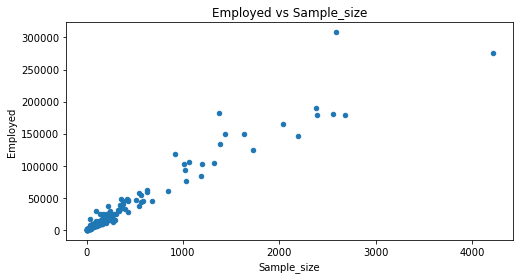

In [9]:
recent_grads.plot(x='Sample_size', y='Employed', kind = 'scatter', 
                  title = 'Employed vs Sample_size', figsize = (8,4))

<AxesSubplot:title={'center':'Median vs Sample_size'}, xlabel='Sample_size', ylabel='Median'>

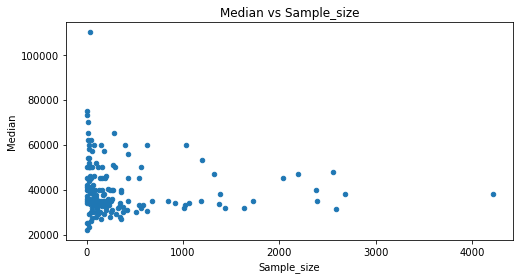

In [10]:
recent_grads.plot(x='Sample_size', y='Median', kind = 'scatter', 
                  title = 'Median vs Sample_size', figsize = (8,4))

<AxesSubplot:title={'center':'Full_time vs Median'}, xlabel='Full_time', ylabel='Median'>

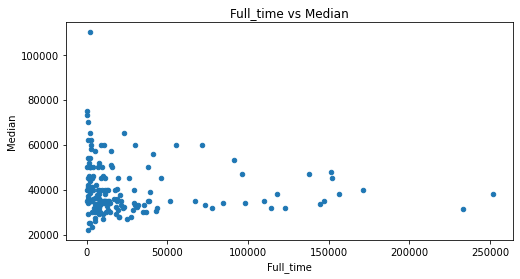

In [11]:
recent_grads.plot(x='Full_time', y='Median', kind = 'scatter', 
                  title = 'Full_time vs Median', figsize = (8,4))

<AxesSubplot:title={'center':'Sharewomen vs Unemployment_rate'}, xlabel='ShareWomen', ylabel='Unemployment_rate'>

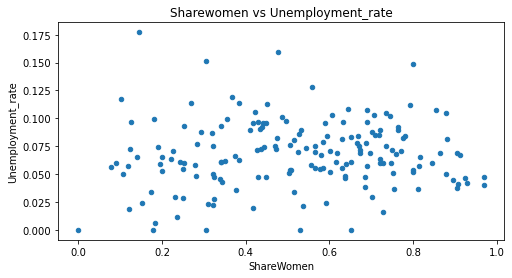

In [12]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind = 'scatter', 
                  title = 'Sharewomen vs Unemployment_rate', figsize = (8,4))

<AxesSubplot:title={'center':'Women vs Median Salary'}, xlabel='Women', ylabel='Median'>

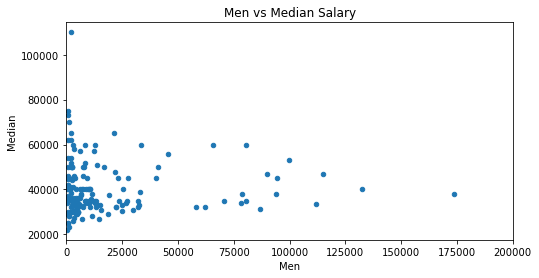

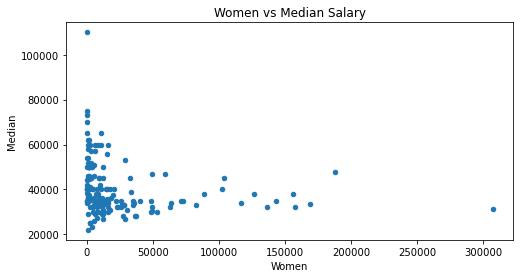

In [33]:
recent_grads.plot(x='Men', y='Median', kind = 'scatter', 
                  title = 'Men vs Median Salary', figsize = (8,4), xlim = (0,200000))
recent_grads.plot(x='Women', y='Median', kind = 'scatter', 
                  title = 'Women vs Median Salary', figsize = (8,4))

**Observations:** <br>
1. Share of men and share of women in different college majors do not seem to have a large impact on the median salary of people who graduate with that major. 

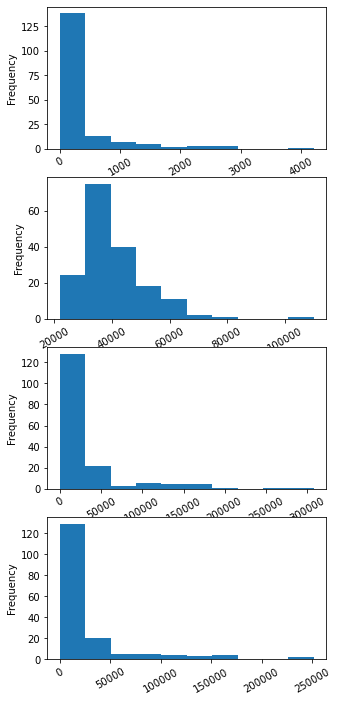

In [14]:
#Series.plot() For looking at data in a single column
cols = ["Sample_size",
        "Median", 
        "Employed", 
        "Full_time", 
        "ShareWomen", 
        "Unemployment_rate", 
        "Men", 
        "Women"
       ]
#For loop so they are easier to compare. We can only loop 4 without the spacing overlapping. 
fig = plt.figure(figsize=(5,12))
for r in range(0,4):
    ax = fig.add_subplot(4,1,r+1)
    ax = recent_grads[cols[r]].plot(kind='hist', rot=30)

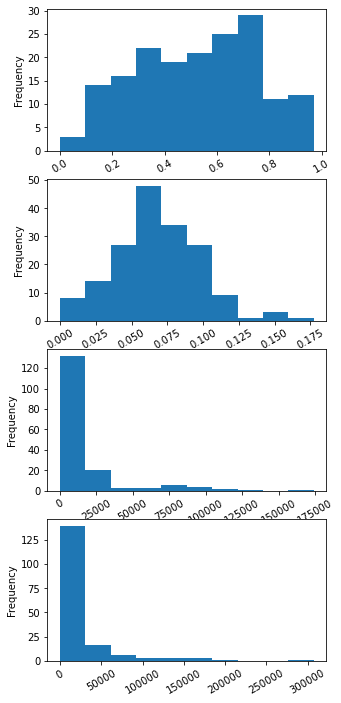

In [15]:
fig = plt.figure(figsize=(5,12))
for r in range(4,8):
    ax = fig.add_subplot(4,1,r-3)
    ax = recent_grads[cols[r]].plot(kind='hist', rot=30)

<AxesSubplot:>

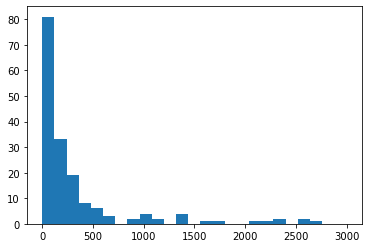

In [16]:
#Another way is to do them seperatly
#Series.hist() we can control the bins. Series.plot(kind='hist') we cannnot
recent_grads['Sample_size'].hist(bins=25, range=(0,3000), grid = False)

<AxesSubplot:>

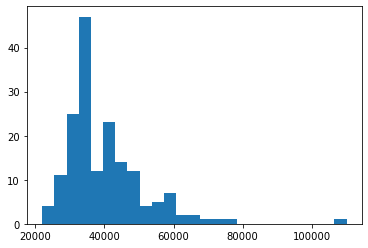

In [17]:
recent_grads['Median'].hist(bins=25, grid = False)

<AxesSubplot:>

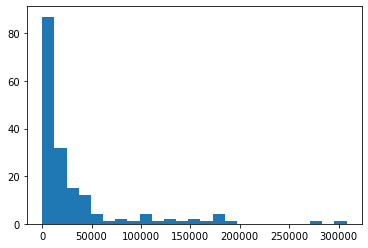

In [18]:
recent_grads['Employed'].hist(bins=25, grid = False)

<AxesSubplot:>

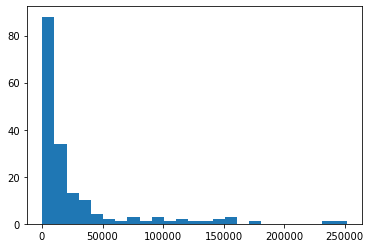

In [19]:
recent_grads['Full_time'].hist(bins=25, grid = False)

<AxesSubplot:>

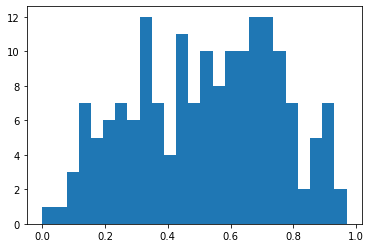

In [20]:
recent_grads['ShareWomen'].hist(bins=25, grid = False)

<AxesSubplot:>

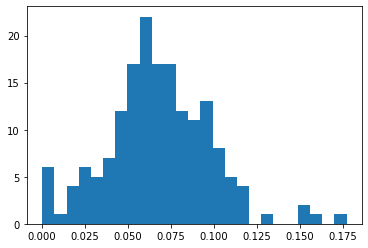

In [21]:
recent_grads['Unemployment_rate'].hist(bins=25, grid = False)

<AxesSubplot:>

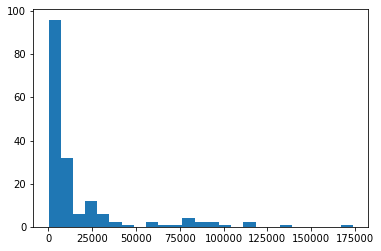

In [22]:
recent_grads['Men'].hist(bins=25, grid = False)

<AxesSubplot:>

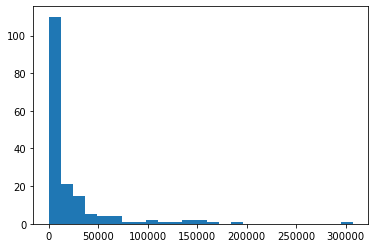

In [23]:
recent_grads['Women'].hist(bins=25, grid = False)

### 4) Scatter Matrix Plot

In [36]:
from pandas.plotting import scatter_matrix 

array([[<AxesSubplot:xlabel='Median', ylabel='Median'>,
        <AxesSubplot:xlabel='Sample_size', ylabel='Median'>],
       [<AxesSubplot:xlabel='Median', ylabel='Sample_size'>,
        <AxesSubplot:xlabel='Sample_size', ylabel='Sample_size'>]],
      dtype=object)

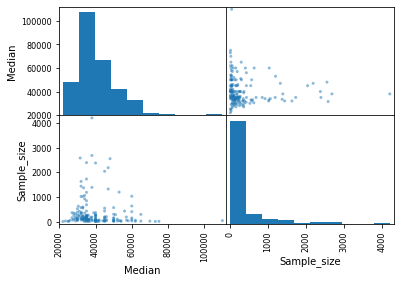

In [39]:
scatter_matrix(recent_grads[['Median','Sample_size']])

array([[<AxesSubplot:xlabel='Median', ylabel='Median'>,
        <AxesSubplot:xlabel='Sample_size', ylabel='Median'>,
        <AxesSubplot:xlabel='Unemployment_rate', ylabel='Median'>],
       [<AxesSubplot:xlabel='Median', ylabel='Sample_size'>,
        <AxesSubplot:xlabel='Sample_size', ylabel='Sample_size'>,
        <AxesSubplot:xlabel='Unemployment_rate', ylabel='Sample_size'>],
       [<AxesSubplot:xlabel='Median', ylabel='Unemployment_rate'>,
        <AxesSubplot:xlabel='Sample_size', ylabel='Unemployment_rate'>,
        <AxesSubplot:xlabel='Unemployment_rate', ylabel='Unemployment_rate'>]],
      dtype=object)

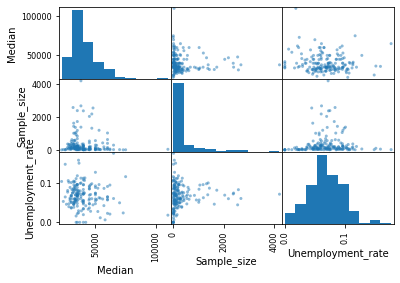

In [40]:
scatter_matrix(recent_grads[['Median','Sample_size', 'Unemployment_rate']])

**Observation:** The scatterplots here show similar information as when they were run eariler in the test. 

## 5) Pandas Bar Plots

<AxesSubplot:>

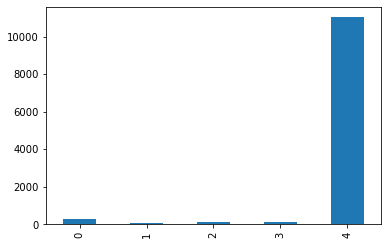

In [41]:
recent_grads[:5]['Women'].plot(kind='bar')

<AxesSubplot:xlabel='Major'>

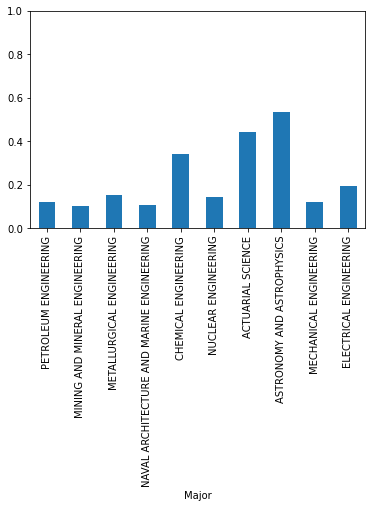

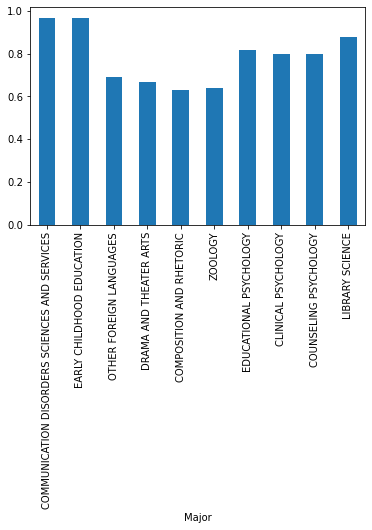

In [57]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', ylim=(0,1), legend=False)
recent_grads[-10:].plot.bar(x='Major', y='ShareWomen', legend =False)

<AxesSubplot:xlabel='Major'>

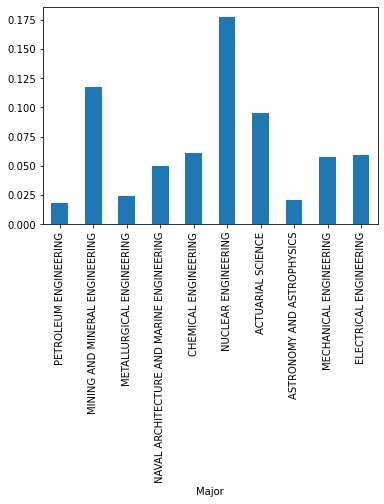

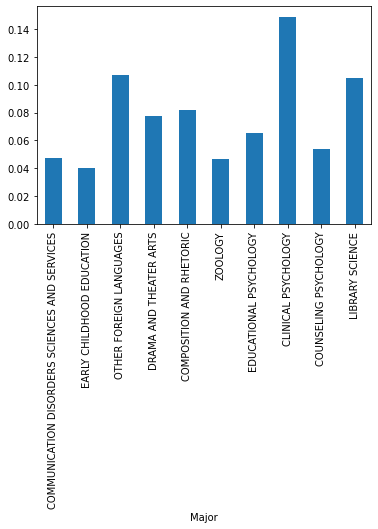

In [55]:
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate', legend=False)
recent_grads[-10:].plot.bar(x='Major', y='Unemployment_rate', legend =False)

**Further Explorations:** 
1. Use a grouped bar plot to compare the number of men with the number of women in each category of majors.
2. Use a box plot to explore the distributions of median salaries and unemployment rate.
3. Use a hexagonal bin plot to visualize the columns that had dense scatter plots from earlier in the project.